In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [55]:
df= pd.read_csv("Iris.csv")

In [56]:
df=df.drop(columns=["Id"])

In [57]:
corr= df.corr()

/var/folders/f4/h_78z0wj7bd9yx8t55yt98xh0000gn/T/ipykernel_26722/4151865681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


In [58]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

[]

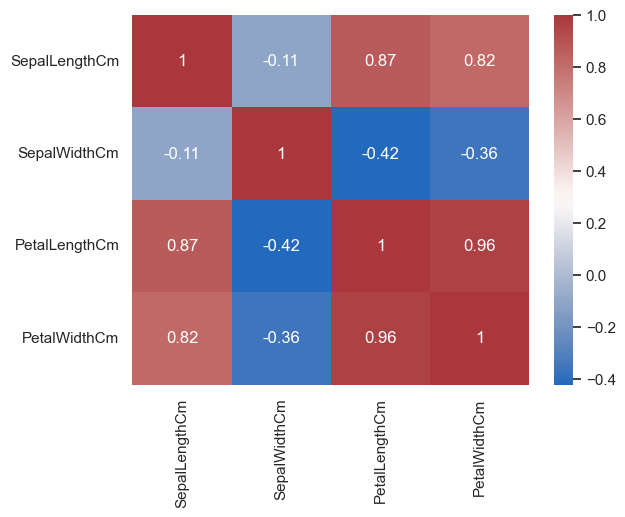

In [59]:
sns.heatmap(corr,cmap="vlag",annot=True)
plt.plot()

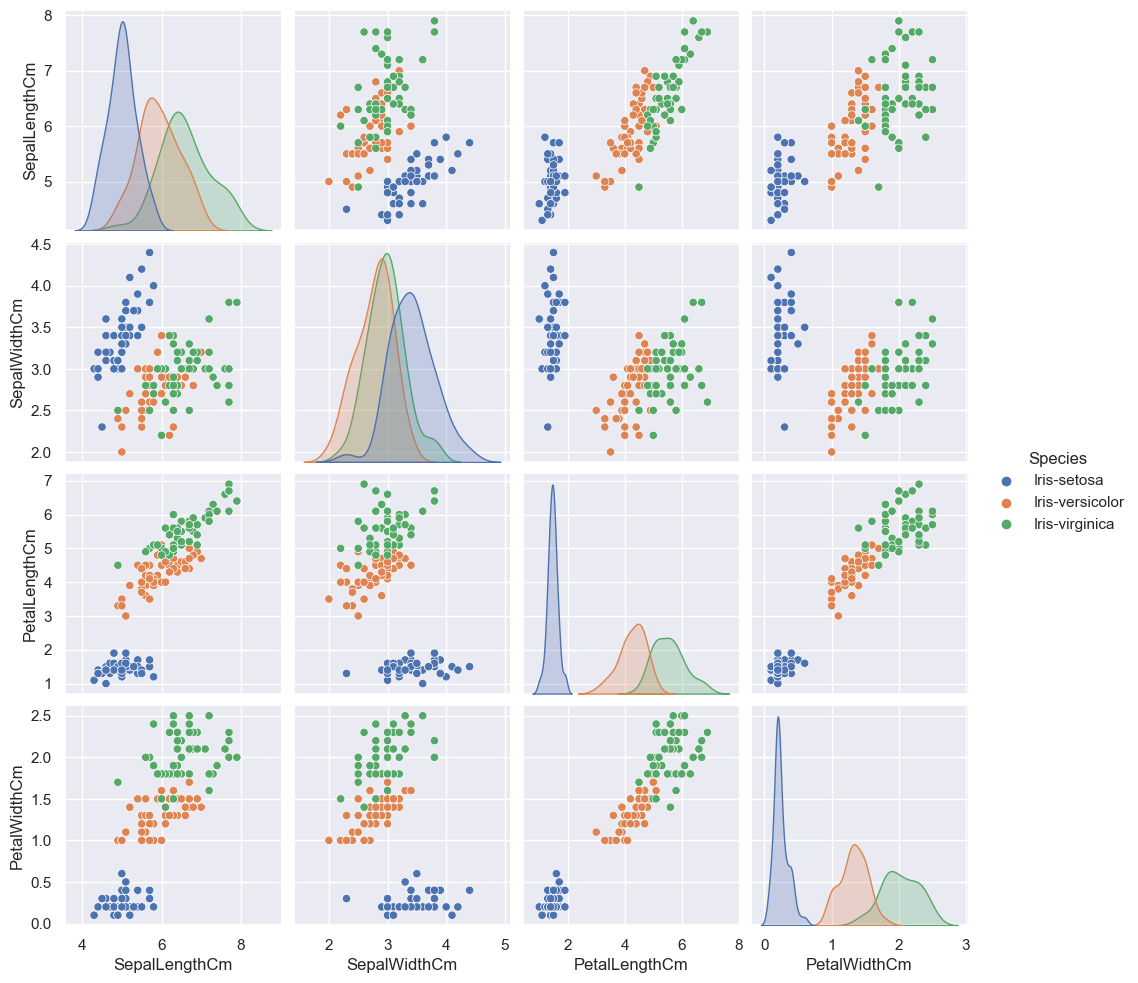

In [60]:
sns.pairplot(data=df,hue="Species")

In [61]:
df.replace({"Species":{"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3}})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X= df.drop(columns="Species")
Y=df.Species
xtrain,xtest,ytrain, ytest= train_test_split(X,Y,shuffle=True,test_size=0.2)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model= LogisticRegression()

In [66]:
model.fit(xtrain,ytrain)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
model.score(xtest,ytest)

0.9

In [68]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier()

In [69]:
model2.fit(xtrain,ytrain)

RandomForestClassifier()

In [70]:
model2.score(xtest,ytest)

0.9333333333333333

In [74]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, xtest, ytest, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

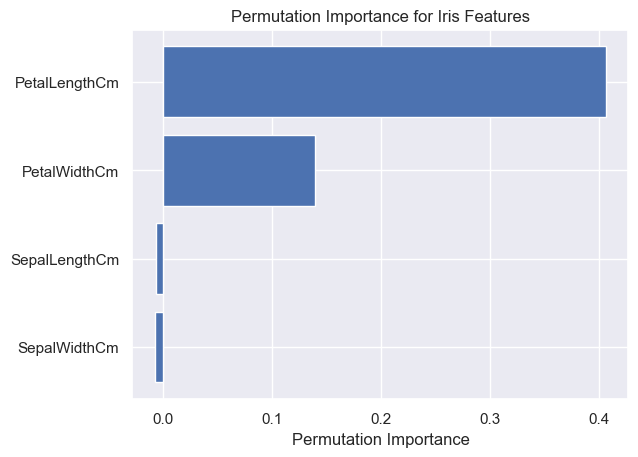

In [76]:
plt.barh(range(len(X.columns)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(X.columns)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Iris Features')
plt.show()

In [78]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(model2, X, features=[0, 1], feature_names=X.columns, target='Species')
plt.suptitle('Partial Dependence Plot for Iris Features')
plt.show()

ImportError: cannot import name 'plot_partial_dependence' from 'sklearn.inspection' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/inspection/__init__.py)